In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
dataset = pd.read_csv("Iris.csv")

In [36]:
dataset.columns = ["ID","sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "species"]
mappings = {
   "Iris-setosa": 0,
   "Iris-versicolor": 1,
   "Iris-virginica": 2
}
dataset["species"] = dataset["species"].apply(lambda x: mappings[x])

dataset.head()

,ID,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [42]:
X = dataset.drop("species",axis=1).values
X = dataset.drop("ID",axis=1).values
y = dataset["species"].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

X_train = np.delete(X_train, 4, axis=1)
X_test = np.delete(X_test, 4, axis=1)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
print(X_train[:10])

tensor([[5.6000, 2.9000, 3.6000, 1.3000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [5.3000, 3.7000, 1.5000, 0.2000]])


In [47]:
# Standardization (x-mean) / standard_deviation
train_scalar = StandardScaler()
test_scalar = StandardScaler()

standardized_train_data = train_scalar.fit_transform(X_train)
standardized_test_data = test_scalar.fit_transform(X_test)

print(standardized_train_data[:10])

[[-0.26491247 -0.38103963 -0.02781218  0.19764911]
 [ 1.13242785 -0.60740026  0.63967922  0.32796727]
 [ 0.31731253 -0.15467955  0.69530344  0.84923976]
 [-0.14846758  3.01436492 -1.1959218  -0.97521398]
 [ 0.66664775 -0.83376035  0.91780057  0.97955792]
 [-0.49780224  0.75076188 -1.08467323 -1.23585024]
 [-0.38135735 -1.51284115  0.08343639 -0.06298705]
 [-0.84713746  1.65620277 -1.14029752 -1.23585024]
 [ 0.55020286  0.52440126  0.58405474  0.58860359]
 [-0.61424713  1.42984269 -1.1959218  -1.23585024]]


In [48]:
# Normalization
scaler = MinMaxScaler()

normalized_train_data = scaler.fit_transform(X_train)
normalized_test_data = scaler.fit_transform(X_test)

print(normalized_train_data[:10])

[[0.36111104 0.37500002 0.44067794 0.49999998]
 [0.69444446 0.3333333  0.64406782 0.54166666]
 [0.49999993 0.41666665 0.66101695 0.70833331]
 [0.38888879 1.         0.08474576 0.125     ]
 [0.58333332 0.29166667 0.72881358 0.74999999]
 [0.30555554 0.58333335 0.11864407 0.04166667]
 [0.33333329 0.1666667  0.47457626 0.41666668]
 [0.22222215 0.74999995 0.10169492 0.04166667]
 [0.55555557 0.54166663 0.6271186  0.62500001]
 [0.27777779 0.70833333 0.08474576 0.04166667]]


In [67]:
# Defining Activation Functions
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)
    
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))


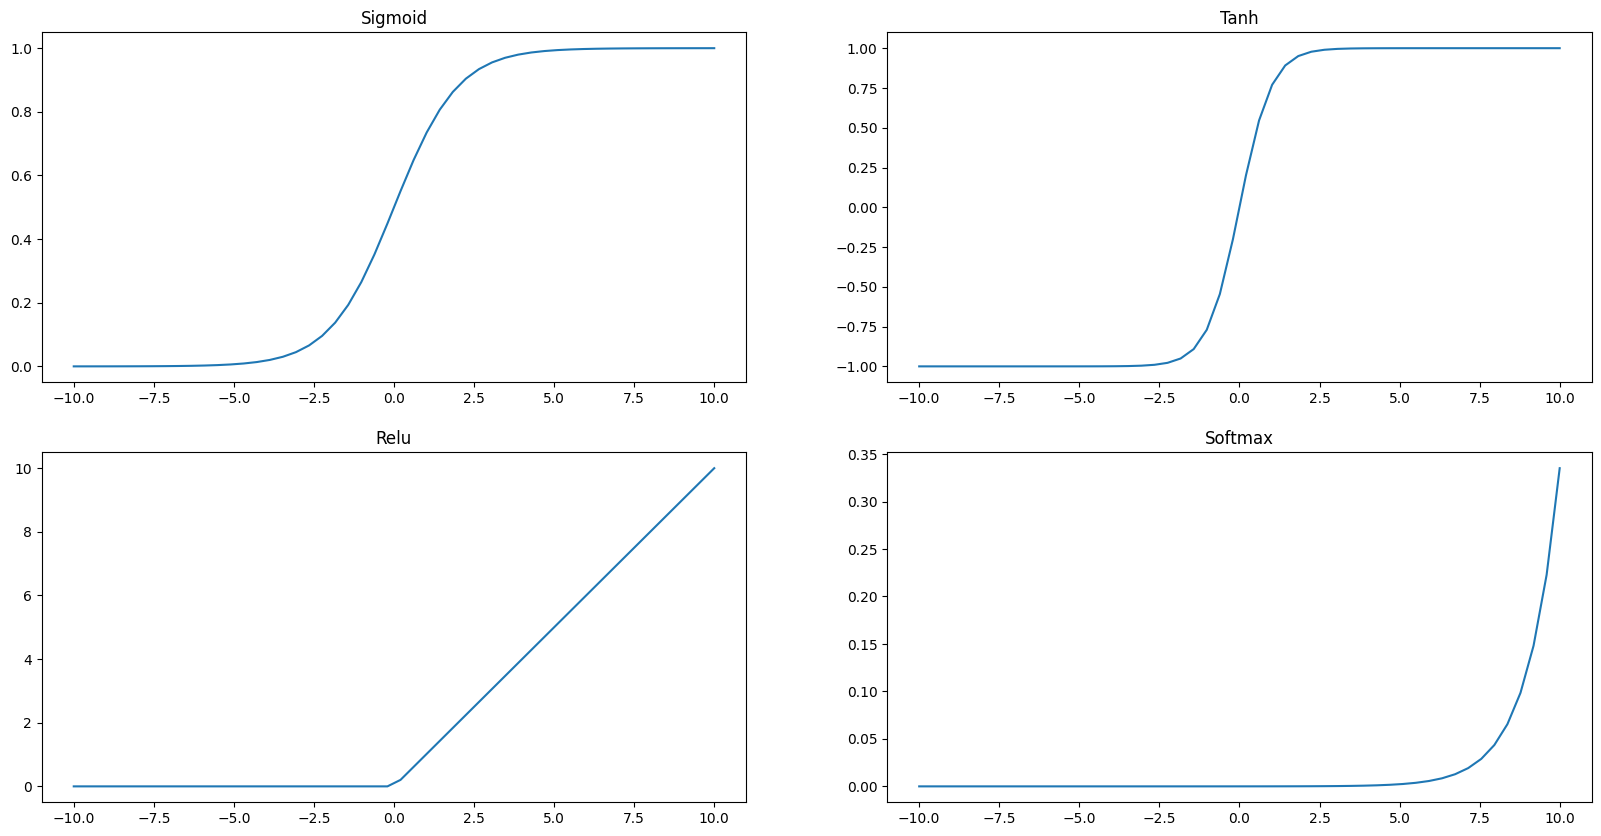

In [75]:
# Plotting Activation Functions
x = np.linspace(-10, 10)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')

plt.subplot(2,2,2)
plt.plot(x, tanh(x))
plt.title('Tanh')

plt.subplot(2,2,3)
plt.plot(x, relu(x))
plt.title('Relu')

plt.subplot(2,2,4)
plt.plot(x, softmax(x))
plt.title('Softmax')
plt.show()

In [79]:
# 1 Dimensional Convolution
signal = np.random.randint(-10,10, 100)
filter = [-1,0,1]

convoluted_signal = np.convolve(signal, filter)

print(signal[0:50])
print()
print(convoluted_signal[0:50])

[  5  -1   4 -10   8   0  -6  -6   5   0  -1  -2  -6  -6  -7  -2   9  -1
  -7   4  -6   7   8  -2   4   2   8   2   8  -7  -7   0   8  -7  -8   1
   0  -1  -6  -4   8   9   1   0  -2   0  -9  -5  -4   8]

[ -5   1   1   9  -4 -10  14   6 -11  -6   6   2   5   4   1  -4 -16  -1
  16  -5  -1  -3 -14   9   4  -4  -4   0   0   9  15  -7 -15   7  16  -8
  -8   2   6   3 -14 -13   7   9   3   0   7   5  -5 -13]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


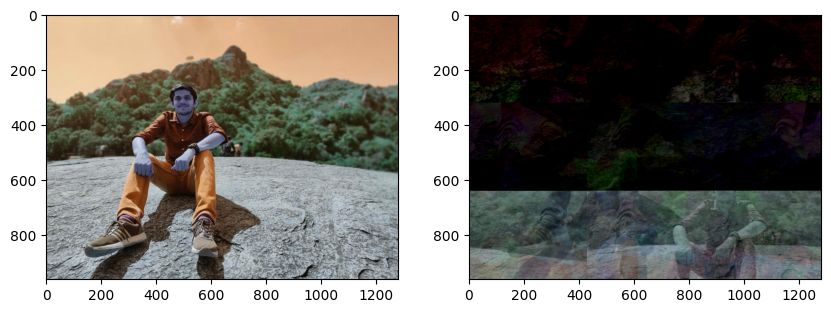

In [137]:
# 2D Convolution
import cv2 

img = cv2.imread('me.jpeg') 
img = np.float32(img)
img = img.reshape((1,3,img.shape[0], img.shape[1]))

img = torch.tensor(img,dtype=float)
conv_layer = nn.Conv2d(3,3,kernel_size=(3,3), padding=1,dtype=float)  
convoluted_image = conv_layer(img)

img = img.reshape(960,1280,3)
convoluted_image = convoluted_image.reshape(960,1280,3)

img = np.asarray(img.detach())
convoluted_image = np.asarray(convoluted_image.detach())

img = img.astype(int, casting='unsafe')
convoluted_image = convoluted_image.astype(int, casting='unsafe')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(convoluted_image)

plt.show()

In [150]:
# 3D Convolution 
# Was getting memory issue for real video
video = cv2.VideoCapture('fish.mp4')
def displayVideo(video):
    while True:
        ret, frame = video.read()

        if not ret:
            break

        cv2.imshow('Video Frame', frame)

        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    video.release()
    cv2.destroyAllWindows()

def convertToTensor(video):
    frames = []

    while True:
        ret, frame = video.read()

        if not ret:
            break

        frame_tensor = torch.from_numpy(frame)  

        frames.append(frame_tensor)

    video_tensor = torch.stack(frames)

    return video_tensor

video_tensor = convertToTensor(video)
video_tensor = np.float32(video_tensor)
video_tensor = video_tensor.reshape((1,3,video_tensor.shape[0], video_tensor.shape[1],video_tensor.shape[2]))
video_tensor = torch.tensor(video_tensor, dtype=float)

in_channels = 3
out_channels = 1
kernel_size = (3, 3, 3)
stride = (1, 1, 1)
padding = (1, 1, 1)
conv3d_layer = nn.Conv3d(in_channels, out_channels, kernel_size, stride, padding)

batch_size = 2
num_frames = 16
num_channels = 3
height = 64
width = 64
video_tensor = torch.randn(batch_size,num_channels, num_frames, height, width)

convoluted_video = conv3d_layer(video_tensor)

print(video_tensor)
print(convoluted_video)

tensor([[[[[-1.3968e+00, -3.1262e-01,  4.5123e-01,  ...,  8.7442e-01,
             3.9679e-02, -2.5726e-01],
           [ 2.4139e+00,  9.3306e-01, -1.1575e+00,  ...,  6.7415e-01,
             5.1353e-01,  1.8079e+00],
           [-1.2819e+00,  4.6446e-01,  7.3435e-01,  ..., -5.2857e-01,
             4.3127e-01, -3.5051e-01],
           ...,
           [-1.0129e+00,  1.3769e-01,  9.4597e-02,  ..., -8.0443e-01,
            -1.4531e+00,  1.1134e+00],
           [-1.1292e+00, -1.0444e+00,  3.5571e-01,  ...,  1.5183e-02,
             1.5291e+00,  1.5401e+00],
           [-1.5593e-01,  1.0871e+00, -1.2517e+00,  ...,  5.3830e-01,
            -5.6052e-01,  1.7634e+00]],

          [[ 7.7324e-01,  7.3808e-03, -1.0337e+00,  ..., -4.6072e-01,
            -7.2812e-01,  5.5162e-01],
           [-1.1549e+00,  2.7847e-01, -2.4461e-01,  ...,  6.2993e-01,
            -1.2194e+00, -1.0858e+00],
           [-4.1964e-01, -1.2345e+00, -4.7700e-01,  ...,  2.5952e-01,
            -7.1656e-01, -7.8739e-01],
 